O objetivo do exercício é praticar a codificação utilizando o Tensorflow e aplicar o mesmo nos conceitos apresentados em aula.

Neste exercício, utilizaremos um dataset bem conhecido: o dataset de dígitos escritos a mão do MNIST. Este dataset consiste em 60.000 imagens, de tamanho 28x28, dos dígitos de 0 a 9, escritos à mão. 

Devem ser criadas duas redes neurais capazes de classificar estas imagens: uma Rede Neural convencional (MLP), contendo duas camadas ocultas de 256 neurônios cada (ou qualquer valor que queira) e uma camada de saída. Algo semelhante à figura abaixo:

![Image](http://cs231n.github.io/assets/nn1/neural_net2.jpeg)

A segunda rede a ser codificada deve ser uma Rede Neural Convolucional (CNN) contendo ao menos duas camadas de convolução, duas camadas de pooling e uma camada fully-connected.

![Image](https://www.mdpi.com/entropy/entropy-19-00242/article_deploy/html/images/entropy-19-00242-g001.png)

Ao final da implementação de ambas, a acurácia das redes deve ser apresentada para verificação de qual rede se saiu melhor.

## Meu caderno

### MLP model

In [206]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [443]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Exemplos de imagens: 


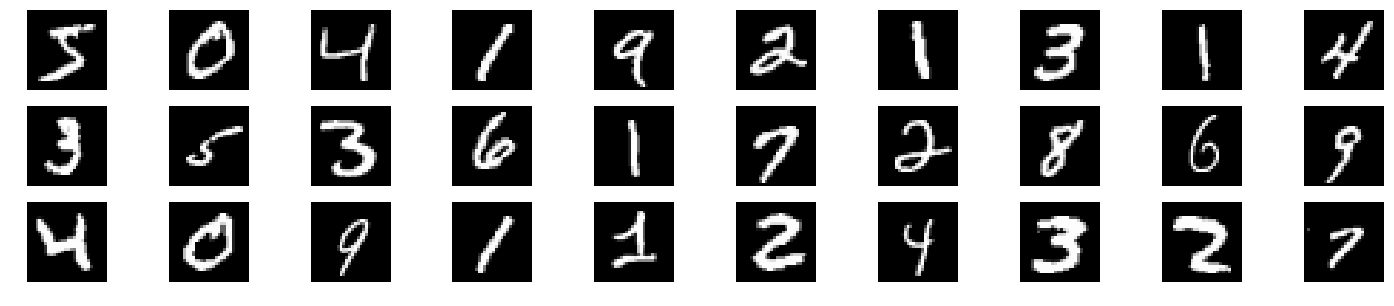

In [217]:
fig, axs = plt.subplots(3,10, figsize=(25,5))
axs = axs.flatten()

for img, ax in zip(X_train[:30], axs):
    ax.imshow(img, cmap='gray')
    ax.axis('off')

print('Exemplos de imagens: ')
plt.show()

In [218]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [219]:
classifier = MLPClassifier(hidden_layer_sizes=(256, 256), activation='relu', verbose=True, learning_rate_init=0.01,
                           batch_size=128, max_iter=10)

In [382]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [221]:
mlp_model = classifier.fit(X_train, y_train)

Iteration 1, loss = 1.27855425
Iteration 2, loss = 0.47556378
Iteration 3, loss = 0.40353413
Iteration 4, loss = 0.31683687
Iteration 5, loss = 0.29421832
Iteration 6, loss = 0.28935498
Iteration 7, loss = 0.29874354
Iteration 8, loss = 0.38272107
Iteration 9, loss = 0.35014040
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


In [383]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


In [223]:
predicted = classifier.predict(X_test)

In [224]:
predicted

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [225]:
mlp_model_accuracy = accuracy_score(y_test, predicted)
print(mlp_model_accuracy*100, "% de acurácia")

88.94 % de acurácia


### CNN model

In [479]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils, to_categorical

In [480]:
# Parâmetros utilizados pela rede neural convolucional
# Caso queira, estes parâmetros podem ser modificados, com exceção do n_input e n_output

learning_rate = 0.05
dropout = 0.75 # Valor de dropout
epochs = 10
batch_size = 50

n_input = 784 # O tamanho de cada imagem do dataset MNIST é 28x28
n_output = 10 # 0-9
img_rows, img_cols = 28, 28

In [481]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Decidi importar a base de dados novamente, conforme acima, para que essa parte do código relacionada a CNN fique independente da parte de cima, relacionada ao MLP

In [482]:
X_treino = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_teste = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_treino = X_treino.astype("float32") / 255
X_teste = X_teste.astype("float32") / 255

y_treino = np_utils.to_categorical(y_train, 10)
y_teste = np_utils.to_categorical(y_test, 10)

In [483]:
#y_train = keras.utils.to_categorical(y_train, 10)
#y_test = keras.utils.to_categorical(y_test, 10)

In [484]:
#X_train = X_train.reshape(-1,28,28,1)
#X_test = X_test.reshape(-1,28,28,1)
#y_train = y_train.reshape(-1,10,1,1)
#y_test = y_test.reshape(-1,10,1,1)

In [485]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [486]:
input_shape = (img_rows, img_cols,1)

In [538]:
cnn_model = Sequential()

In [539]:
cnn_model.add(
            Conv2D(filters=60, 
                   kernel_size=(3,3),
                   strides=(1,1),
                   activation='relu',
                   input_shape=input_shape)
) # primeira camada de convolucao

In [540]:
cnn_model.add(
            MaxPooling2D(pool_size=(2,2),
                         strides=2)
) # primeira camada de pooling

In [541]:
cnn_model.add(
            Conv2D(filters=30, 
                   kernel_size=(3,3),
                   strides=(1,1),
                   activation='relu')
) # segunda camada de convolucao

In [542]:
cnn_model.add(
            MaxPooling2D(pool_size=(2,2),
                         strides=2)
) # segunda camada de pooling

In [543]:
cnn_model.add(Flatten())

In [544]:
cnn_model.add(
            Dense(units = 128, activation = 'relu')
) # uma camada fully-connected

In [545]:
cnn_model.add(
            Dropout(dropout)
)

In [546]:
cnn_model.add(
            Dense(n_output, activation='softmax')
) # uma camada de saida

In [547]:
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [548]:
cnn_model.optimizer.lr = learning_rate

In [549]:
cnn_model.fit(X_treino, y_treino, batch_size=batch_size, epochs=epochs, validation_split=0.2, 
              verbose=1, validation_data=(X_teste, y_teste))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 258s 4ms/step - loss: 2.3338 - acc: 0.1049 - val_loss: 2.3075 - val_acc: 0.0958
Epoch 2/10
60000/60000 [==============================] - 260s 4ms/step - loss: 2.3061 - acc: 0.1051 - val_loss: 2.3037 - val_acc: 0.0958
Epoch 3/10
60000/60000 [==============================] - 259s 4ms/step - loss: 2.3061 - acc: 0.1072 - val_loss: 2.3087 - val_acc: 0.0980
Epoch 4/10
60000/60000 [==============================] - 252s 4ms/step - loss: 2.3061 - acc: 0.1064 - val_loss: 2.3075 - val_acc: 0.1009
Epoch 5/10
60000/60000 [==============================] - 248s 4ms/step - loss: 2.3064 - acc: 0.1060 - val_loss: 2.3138 - val_acc: 0.0974
Epoch 6/10
60000/60000 [==============================] - 257s 4ms/step - loss: 2.3064 - acc: 0.1053 - val_loss: 2.3038 - val_acc: 0.0980
Epoch 7/10
60000/60000 [==============================] - 255s 4ms/step - loss: 2.3056 - acc: 0.1047 - val_loss: 2.3052 - 

In [550]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 26, 26, 60)        600       
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 13, 13, 60)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 11, 11, 30)        16230     
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 5, 5, 30)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 750)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               96128     
_________________________________________________________________
dropout_33 (Dropout)         (None, 128)               0         
__________

In [551]:
cnn_model_accuracy = cnn_model.evaluate(X_teste, y_teste, batch_size=batch_size, verbose=1)

10000/10000 [==============================] - 19s 2ms/step


In [552]:
print(cnn_model_accuracy[1]*100, "% de acurácia")

9.819999927654862 % de acurácia


## Comparando os resultados

In [583]:
import pandas as pd

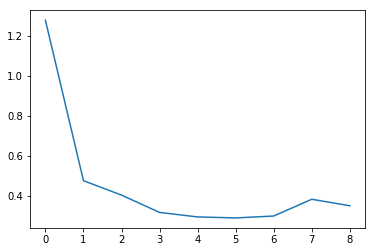

In [584]:
plt.plot(mlp_model.loss_curve_)

In [598]:
cnn_df = pd.DataFrame(data={'loss': [cnn_model_accuracy[0]], 'accuracy': [cnn_model_accuracy[1]]})
cnn_df

,loss,accuracy
0,2.313559,0.0982


In [632]:
compare = pd.DataFrame(data={'CNN loss':[cnn_model_accuracy[0]], 'CNN accuracy': [cnn_model_accuracy[1]], 
                             'MLP accuracy': [mlp_model_accuracy]})
compare

,CNN loss,CNN accuracy,MLP accuracy
0,2.313559,0.0982,0.8894


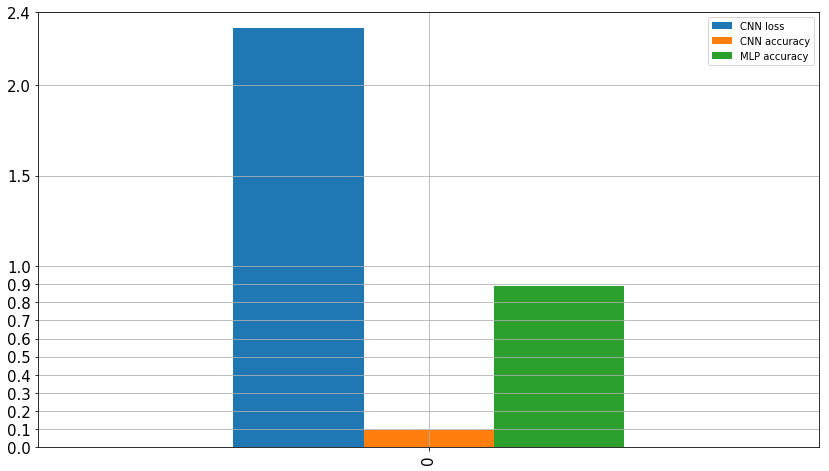

In [667]:
compare.plot(kind='bar', figsize=(14,8), fontsize=15, grid=True, ylim=(0,2.4), 
             yticks=(0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,2.4))

Comparação dos resultados obtidos: a rede MLP saiu-se melhor em comparação à CNN

## Caderno anterior

In [2]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

tf.logging.set_verbosity(tf.logging.ERROR)

/Users/erick.giffoni/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
# Carregando o dataset a ser trabalhado, e separando o mesmo em variáveis

mnist = input_data.read_data_sets('mnist/', one_hot=True)

training_set = mnist.train

x_train, y_train = mnist.train.images, mnist.train.labels
x_val, y_val = mnist.validation.images, mnist.validation.labels

x_test, y_test = mnist.test.images, mnist.test.labels

#print('##############################')
#print('x_test: {}'.format(x_test.shape))
#print('y_test: {}'.format(y_test.shape))

In [ ]:
# Parâmetros utilizados pela rede neural inicial
# Caso queira, estes parâmetros podem ser modificados, com exceção do n_input e n_output
learning_rate = 0.01
epochs = 10
batch_size = 128

n_input = 784 # O tamanho de cada imagem do dataset MNIST é 28x28
n_output = 10 # 0-9

In [ ]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_output])

In [ ]:
# Célula para criação das variáveis referentes aos pesos e bias

In [ ]:
# Construção do modelo. O modelo deve conter três camadas além da camada de entrada,
# duas camadas ocultas de N neurônios cada, e uma camada de saída

In [ ]:
# Célula para definição da função de custo e validação do modelo

In [ ]:
# Inicialização das variáveis do tensorflow
start = tf.global_variables_initializer()

In [ ]:
# Execução do modelo
with tf.Session() as sess:
    sess.run(start)
    
    # SEU CÓDIGO VIRÁ AQUI

In [ ]:
# Resetando o grafo de execução do Tensorflow para construção da CNN
tf.reset_default_graph()

In [ ]:
# Parâmetros utilizados pela rede neural convolucional
# Caso queira, estes parâmetros podem ser modificados, com exceção do n_input e n_output

learning_rate = 0.01
dropout = 0.75 # Valor de dropout
epochs = 10
batch_size = 128

n_input = 784 # O tamanho de cada imagem do dataset MNIST é 28x28
n_output = 10 # 0-9

In [ ]:
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_output])

keep_prob = tf.placeholder(tf.float32)

In [ ]:
# Célula para criação das variáveis referentes aos pesos e bias

In [ ]:
# Célula para declaração da camada de convolução do modelo

In [ ]:
# Célula para declaração da camada de pooling

In [ ]:
# Construção do modelo. O modelo deve conter ao menos duas camadas de convolução,
# duas camadas de pooling e uma camada fully-connected. 

In [ ]:
# Construção do modelo

In [ ]:
# Célula para definição da função de custo e validação do modelo

In [ ]:
# Inicialização das variáveis do tensorflow
start = tf.global_variables_initializer()

In [ ]:
# Execução do modelo
with tf.Session() as sess:
    sess.run(start)
    
    # SEU CÓDIGO VIRÁ AQUI

In [ ]:
# Resetando o grafo de execução do Tensorflow para construção da CNN
tf.reset_default_graph()

In [ ]:
# APRESENTAR AO FINAL A ACURÁCIA OBTIDA NOS DOIS MODELOS